In [1]:
from collections import defaultdict
import graphviz

## Undirected Unweighted Graph

In [2]:
def undirected_unweighted(lines):
    V = set()
    E = defaultdict(set)

    for line in lines.splitlines():
        u, v = line.strip().split(",")

        V.add(u); V.add(v)
        E[u].add(v); E[v].add(u)
    
    return V, E

def draw_undirected_unweighted(G):
    V, E = G
    dot = graphviz.Graph()
    dot.attr(rankdir='LR')
    seen_edges = set()

    for v in E[u]:
        if (v, u) in seen_edges:
            continue
        seen_edges.add((u, v))
        dot.edge(u, v)
    
    return graphviz.Source(dot.source)
    #dot.render('graph', format='svg')

## Directed Unweighted Graph

In [3]:
def directed_unweighted(lines):
    V = set()
    E = defaultdict(set)

    for line in lines.splitlines():
        u, v = line.strip().split(",")

        V.add(u); V.add(v)
        E[u].add(v)
    
    return V, E

def draw_directed_unweighted(G):
    V, E = G
    dot = graphviz.Digraph()
    dot.attr(rankdir='LR')

    for u in V:
        dot.node(u)
        for v in E[u]:
            dot.edge(u, v)
    
    return graphviz.Source(dot.source)
    #dot.render('graph', format='svg')

## Undirected Weighted Graph

In [4]:
def undirected_weighted(lines):
    V = set()
    E = defaultdict(set)
    weights = {}

    for line in lines.splitlines():
        print(line)
        u, v, w = line.strip().split(",")

        V.add(u); V.add(v)
        E[u].add(v); E[v].add(u)

        weights[(u, v)] = w; weights[(v, u)] = w;
    
    return V, E, weights

def draw_undirected_weighted(G):
    V, E, w = G
    dot = graphviz.Graph()
    dot.attr(rankdir='LR')
    seen_edges = set()

    for u in V:
        dot.node(u)

        for v in E[u]:
            if (v, u) in seen_edges:
                continue
            seen_edges.add((u, v))
            dot.edge(u, v, label=str(w[(u, v)]))
    
    return graphviz.Source(dot.source)
    #dot.render('graph', format='svg')

## Directed Weighted Graph

In [5]:
def directed_weighted(lines):
    V = set()
    E = defaultdict(set)
    weights = {}

    for line in lines.splitlines():
        u, v, w = line.strip().split(",")

        V.add(u); V.add(v)
        E[u].add(v)

        weights[(u, v)] = w
    
    return V, E, weights

def draw_directed_weighted(G):
    V, E, w = G
    dot = graphviz.Digraph()
    dot.attr(rankdir='LR')

    for u in V:
        dot.node(u)
        for v in E[u]:
            dot.edge(u, v, label=str(w[(u, v)]))

    return graphviz.Source(dot.source)
    #dot.render('graph', format='svg')

## Depth First Search and Breadth First Search

In [6]:
def DFSVisit(G, u, visited=set(), stack=None):
    V, E = G
    visited.add(u)
    
    for v in E[u]:
        if v not in visited:
            DFSVisit(G, v, visited, stack)
    
    if stack is not None:
        stack.append(u)
    
    return visited

def DFSFull(G):
    V, E = G
    visited = set()
    
    for v in V:
        if v not in visited:
            DFSVisit(G, v, visited)
    
    return visited

## Topological Sorting with DFS

In [7]:
def DFSTopSort(G):
    stack = []
    visited = set()
    V, E = G
    
    for u in V:
        if u not in visited:
            DFSVisit(G, u, visited, stack)
    
    return stack

## Test program

Directed weighted:
V: {'A', 'E', 'B', 'D', 'F', 'C'}
E: defaultdict(<class 'set'>, {'A': {'B'}, 'B': {'C', 'E', 'D'}, 'E': {'F'}, 'F': {'C'}})
Topological sorting: ['C', 'F', 'E', 'D', 'B', 'A']


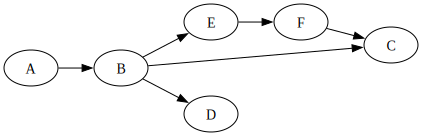

In [8]:
lines = "A,B \n B,C \n B,D \n B,E \n B,D \n E,F \n F,C"
G = directed_unweighted(lines)
print("Directed weighted:" + "\nV: " + str(G[0]) + "\nE: " + str(G[1]))

top_sorted = DFSTopSort(G)
print("Topological sorting: " + str(top_sorted))

draw_directed_unweighted(G)